In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy
import scipy
import math
import matplotlib
import matplotlib.dates as mpd
import pylab as plt
import datetime as dtm
import pytz
import multiprocessing as mpp
import pickle
import sys
import os
import socket
#import lmod
# lmod.load('system')
# lmod.load('texlive')
# lmod.
#
# TODO: phase out unreferenced hpc_lib calls...
import hpc_lib
import hpc_reports
#
# def running_mean(X,n=10):
#     return (numpy.cumsum(numpy.insert(X,0,0))[n:] - numpy.cumsum(numpy.insert(X,0,0))[:-n])/n
# #

In [4]:
n_cpus = 1
#print('** epoch: {}'.format(mpd.get_epoch()))


In [5]:
N_report_len = 180
end_dtm = dtm.datetime(2022,10,19)
end_date = end_dtm.date()
start_date = end_date - dtm.timedelta(days=N_report_len)
print('*** dates: {} - {}'.format(start_date, end_date))
#partition='serc'
partition=None
group=None
s_user=None
verbose=1
# group='oneillm'
# group='edunham'
#s_user = 'labraha2'
force_fetch = True
#
sacct_h5_file = f'sacct_data/sacct_p{str(partition).upper()}_g{str(group).upper()}_u{s_user}_{start_date.year:04}{start_date.month:02}{start_date.day:02}_{end_dtm.year:04}{end_dtm.month:02}{end_dtm.day:02}.h5'
print(f'*** sacct_h5_file [{os.path.isfile(sacct_h5_file)}]: {sacct_h5_file}')

*** dates: 2022-04-22 - 2022-10-19
*** sacct_h5_file [True]: sacct_data/sacct_pNONE_gNONE_uNone_20220422_20221019.h5


In [6]:
# NOTE: to get individual users, eg to get Eric's group usage:
#. sacct --allusers --user=labraha2 --start=2022-01-01 --end=2022-06-15
#
# NOTE: additional options can be passed in the more_options=[] arrary, or just as sacct_{option-name}={val}
#
if os.path.isfile(sacct_h5_file) and not force_fetch:
    print('*** Creating SACCT object from HDF5 {}'.format(sacct_h5_file))
    SACCT_obj = hpc_lib.SACCT_data_from_h5(sacct_h5_file, keep_raw_data=False, n_cpu=n_cpus)
    #
    
else:
    print('*** Fetching SACCT data directly')
    SACCT_obj = hpc_lib.SACCT_data_direct(group=group, partition=partition, start_date=str(start_date),
                                          n_cpu=n_cpus, verbose=verbose,
                                          end_date=str(end_date), keep_raw_data=False)
    # , sacct_user=s_user
    print(f'** writing HDF5: {sacct_h5_file}')
    SACCT_obj.write_hdf5(sacct_h5_file)
    #
#
print('** ', SACCT_obj.jobs_summary.dtype.names)

*** Fetching SACCT data directly
***  2022-04-22 00:00:00+00:00 <class 'datetime.datetime'> 2022-10-19 00:00:00+00:00 <class 'datetime.datetime'>
*** DEBUG: Now execute load_sacct_data(); options_str= --delimiter="|" 
** DEBUG: sacct_str:: sacct  --delimiter="|"  -p --allusers --starttime=2022-04-22T00:00:00 --endtime=2022-10-19T00:00:00 --format=User,Group,GID,Account,Jobname,JobID,JobIDRaw,partition,state,time,ncpus,nnodes,Submit,Eligible,start,end,elapsed,SystemCPU,UserCPU,TotalCPU,NTasks,CPUTimeRaw,Suspended,ReqTRES,AllocTRES,MaxRSS,AveRSS,AveVMsize,MaxVMsize,MaxDiskWrite,MaxDiskRead,AveDiskWrite,AveDiskRead 
** DEBUG: processing SACCT data, n_cpu=1, start: 2022-04-22 00:00:00+00:00, end: 2022-05-02 00:00:00+00:00
** [0]: sacct  --delimiter="|"  -p --allusers --starttime=2022-04-22T00:00:00 --endtime=2022-05-02T00:00:00 --format=User,Group,GID,Account,Jobname,JobID,JobIDRaw,partition,state,time,ncpus,nnodes,Submit,Eligible,start,end,elapsed,SystemCPU,UserCPU,TotalCPU,NTasks,CPUTime

** DEBUG: processing SACCT data, n_cpu=1, start: 2022-09-29 00:00:00+00:00, end: 2022-10-09 00:00:00+00:00
** [16]: sacct  --delimiter="|"  -p --allusers --starttime=2022-09-29T00:00:00 --endtime=2022-10-09T00:00:00 --format=User,Group,GID,Account,Jobname,JobID,JobIDRaw,partition,state,time,ncpus,nnodes,Submit,Eligible,start,end,elapsed,SystemCPU,UserCPU,TotalCPU,NTasks,CPUTimeRaw,Suspended,ReqTRES,AllocTRES,MaxRSS,AveRSS,AveVMsize,MaxVMsize,MaxDiskWrite,MaxDiskRead,AveDiskWrite,AveDiskRead 

** DEBUG: processing SACCT data, n_cpu=1, start: 2022-10-09 00:00:00+00:00, end: 2022-10-19 00:00:00+00:00
** [17]: sacct  --delimiter="|"  -p --allusers --starttime=2022-10-09T00:00:00 --endtime=2022-10-19T00:00:00 --format=User,Group,GID,Account,Jobname,JobID,JobIDRaw,partition,state,time,ncpus,nnodes,Submit,Eligible,start,end,elapsed,SystemCPU,UserCPU,TotalCPU,NTasks,CPUTimeRaw,Suspended,ReqTRES,AllocTRES,MaxRSS,AveRSS,AveVMsize,MaxVMsize,MaxDiskWrite,MaxDiskRead,AveDiskWrite,AveDiskRead 

*** 

/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2448: RuntimeWarning: All-NaN slice encountered
  ('NTasks',    'NTasks', lambda x: numpy.nanmax(x).astype(int)),\
/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2626: RuntimeWarning: All-NaN slice encountered
  jobs_summary[cls][k] = tuple([f(sub_data[n2]) for (n1, n2, f) in js_col_f])


** DEBUG: jobs_summary.shape = (167444,)
** DEBUG: shapes:: (167444,), (167444,)
*** DEBUG: 5000, None


/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2779: RuntimeWarning: invalid value encountered in greater_equal
  ix_k = numpy.where(numpy.logical_and(t_start<=t, t_end>=(t-bin_size) ))[0]


** writing HDF5: sacct_data/sacct_pNONE_gNONE_uNone_20220422_20221019.h5
*** DEBUG: updating column [index], type=<i8
*** DEBUG: updating column [User], type=('|S8', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Group], type=('|S5', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [GID], type=('|S3', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Account], type=('|S6', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [JobName], type=('|S59', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [JobID], type=('|S16', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [JobIDRaw], type=('|S7', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Partition], type=('|S7', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [State], type=('|S19', {'h5py_encoding': 'ascii'})
*** DEBUG: updating column [Timelimit], type=<f8
*** DEBUG: updating column [NCPUS], type=<i8
*** DEBUG: updating column [NNodes], type=<i8
*** DEBUG: updating column [Submit], t

In [7]:
#
SACCT_obj.jobs_summary = SACCT_obj.jobs_summary[SACCT_obj['Start']>(mpd.date2num(SACCT_obj.start_date) - 15.)]
print('** Start: ', SACCT_obj.start_date, mpd.date2num(SACCT_obj.start_date))

** Start:  2022-04-22 00:00:00+00:00 738267.0


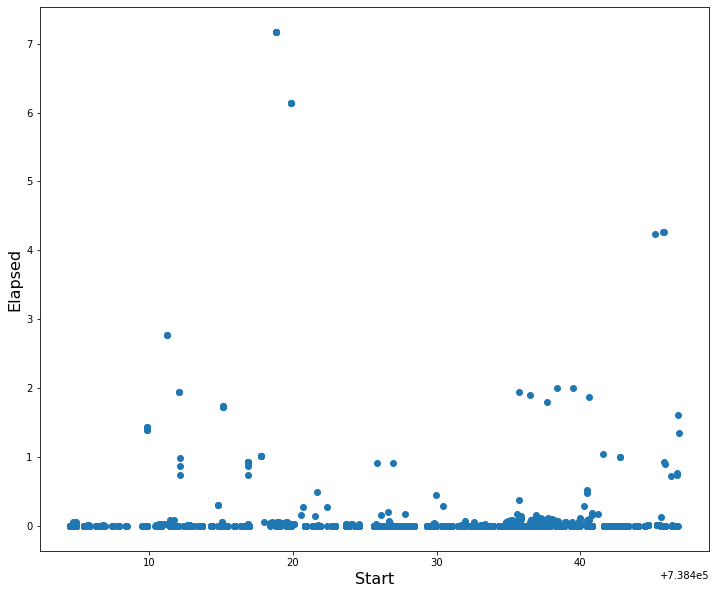

In [8]:
fg = plt.figure(figsize=(12,10))
ax1 = fg.add_subplot(1,1,1)
#
#hh = ax1.hist(SACCT_obj['Start'], bins=100)
ax1.scatter(SACCT_obj['Start'], SACCT_obj['Elapsed'])
ax1.set_xlabel('Start', size=16)
ax1.set_ylabel('Elapsed', size=16)
#
for k, rw in enumerate(SACCT_obj[SACCT_obj['Start']<738350]):
    print(f'** {k}: ', [rw[s] for s in ['User', 'JobID', 'Account', 'Partition', 'State', 'NCPUS', 'Submit', 'Start', 'End', 'Elapsed']])

In [9]:
# # check date epoch:
# dt_test = SACCT_obj.jobs_summary['Start'][0]
# yr_test = mpd.num2date(dt_test).year
# print(f'** yr_test: {yr_test}')
# #print('** ', mpd.num2epoch(dt_test))
# if yr_test>3000:
#     mpd.set_epoch('0000-12-31T00:00:00')
# yr_test = mpd.num2date(dt_test)
# print(f'** yr_test: {yr_test}')

In [10]:

print('** ', SACCT_obj.jobs_summary.dtype)
print('** ', type(SACCT_obj.jobs_summary['User'][0]))
#
my_ary = numpy.array(len(SACCT_obj.jobs_summary), dtype=SACCT_obj.jobs_summary.dtype)
print('** ', my_ary.dtype)
#
for cl,tp in SACCT_obj.jobs_summary.dtype.descr:
    print('** ', cl, tp)
    

print('** ** ', SACCT_obj.jobs_summary['Group'].astype(str)[0])
#
print(f'** min,max: Start: {mpd.num2date(numpy.min(SACCT_obj["Start"]))} \
      {mpd.num2date(numpy.max(SACCT_obj["Start"]))}')


**  [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobName', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', 'O'), ('Suspended', 'O'), ('ReqTRES', 'O'), ('AllocTRES', 'O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', 'O'), ('NGPUs', '<i8')]
**  <class 'str'>
**  [('index', '<i8'), ('User', 'O'), ('Group', 'O'), ('GID', 'O'), ('Account', 'O'), ('JobName', 'O'), ('JobID', 'O'), ('JobIDRaw', 'O'), ('Partition', 'O'), ('State', 'O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8')

*** DEBUG t_now: 738448.4408288896, t_max: 738448.207662037


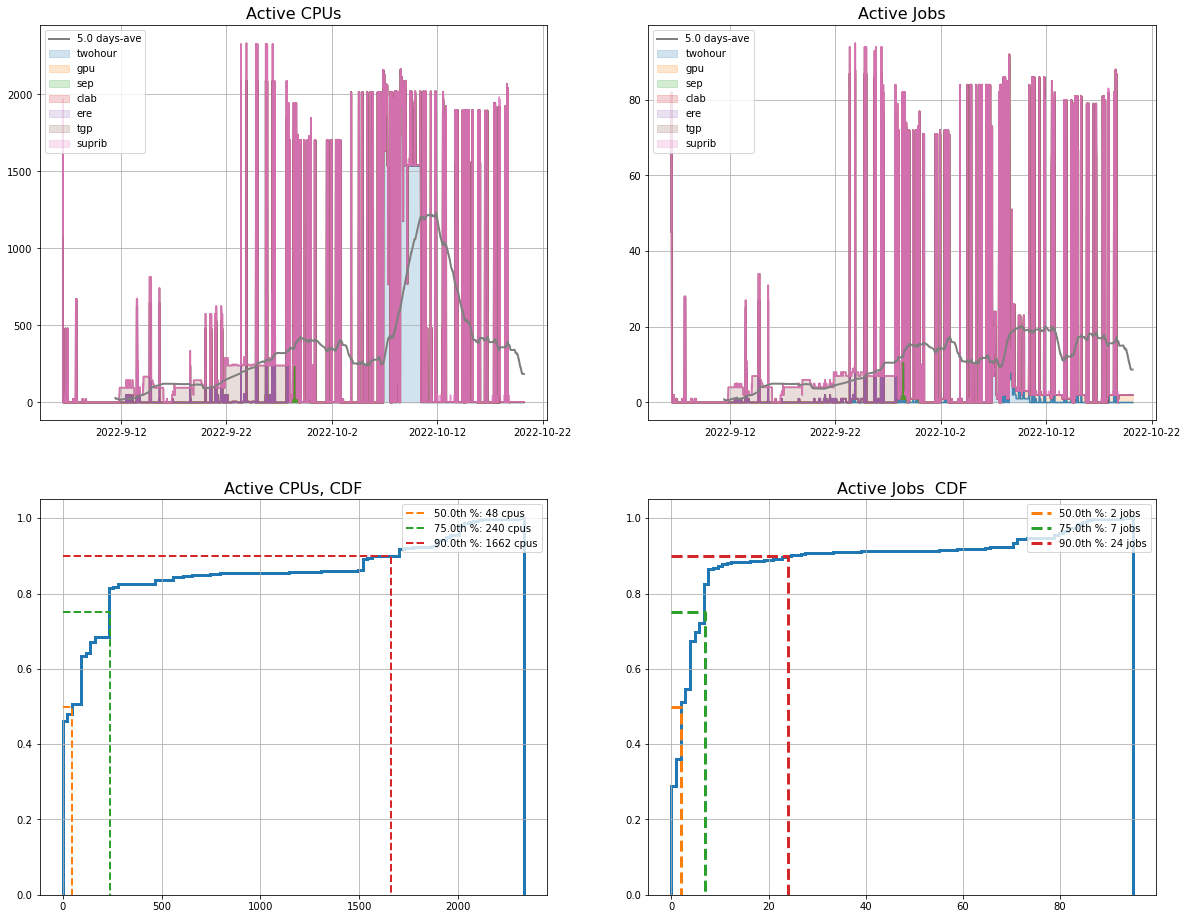

In [11]:
rep_cpu_lc = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Partition')

/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2779: RuntimeWarning: invalid value encountered in greater_equal
  ix_k = numpy.where(numpy.logical_and(t_start<=t, t_end>=(t-bin_size) ))[0]


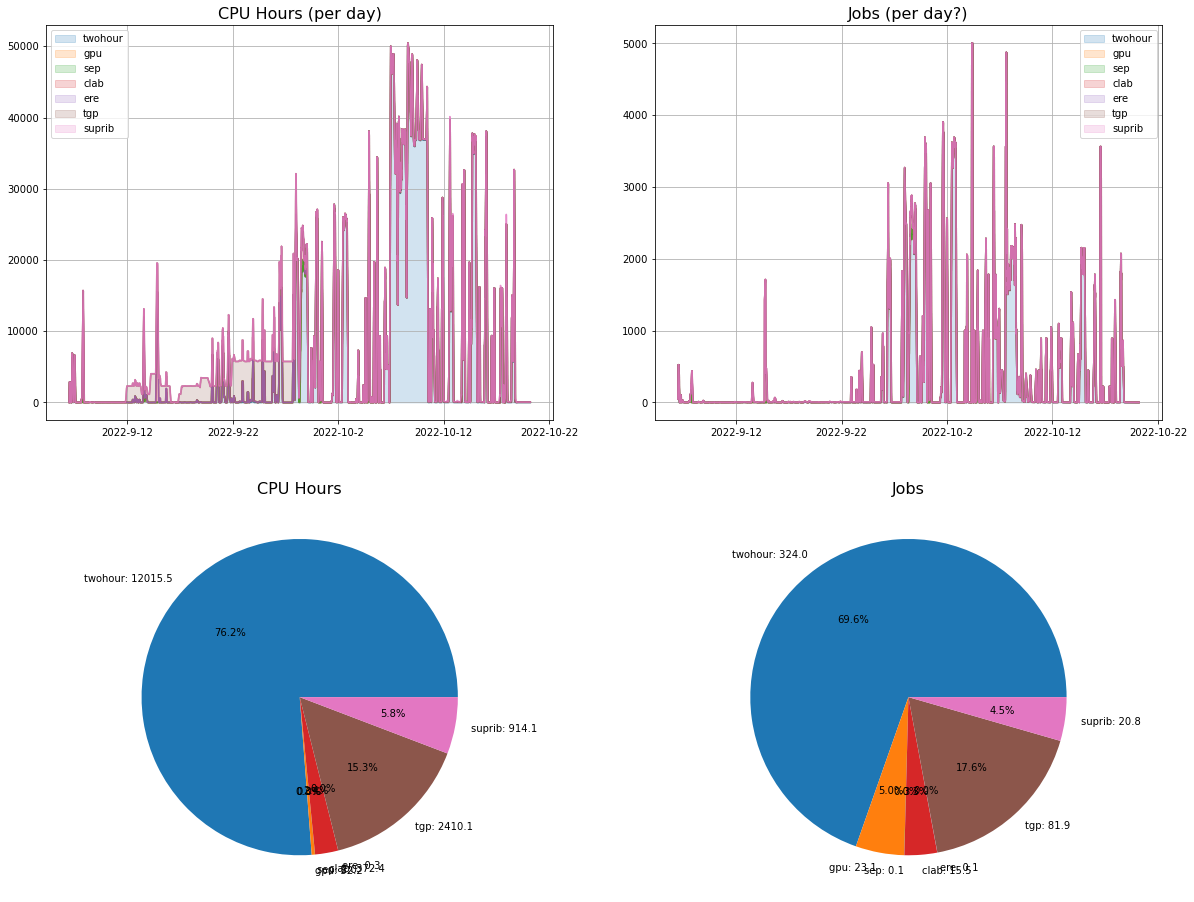

In [12]:
fg_cpuhlc = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Partition', autopct='%1.1f%%')

/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2779: RuntimeWarning: invalid value encountered in greater_equal
  ix_k = numpy.where(numpy.logical_and(t_start<=t, t_end>=(t-bin_size) ))[0]


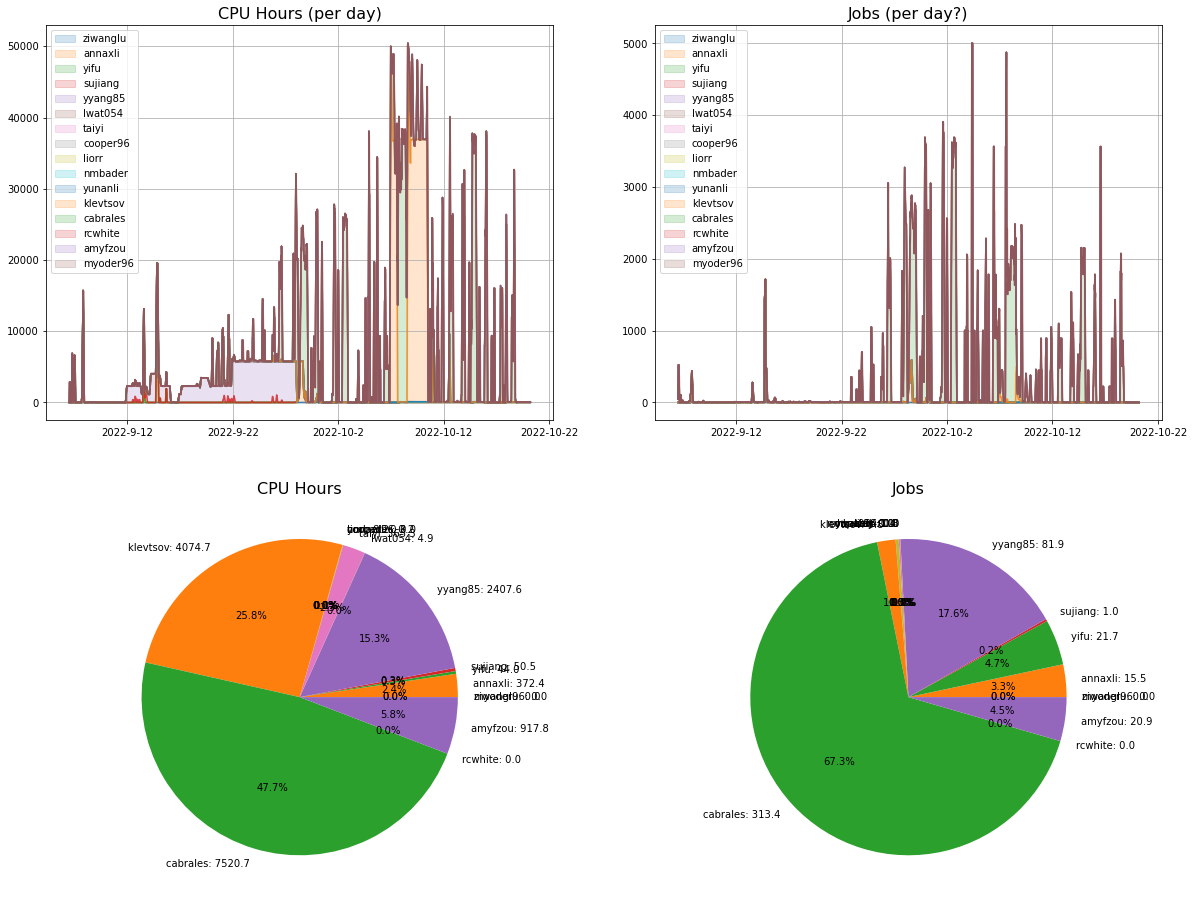

In [13]:
fg_cpuhl_u = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='User', autopct='%1.1f%%')

/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2779: RuntimeWarning: invalid value encountered in greater_equal
  ix_k = numpy.where(numpy.logical_and(t_start<=t, t_end>=(t-bin_size) ))[0]


*** DEBUG t_now: 738448.4412011475, t_max: 738448.207662037


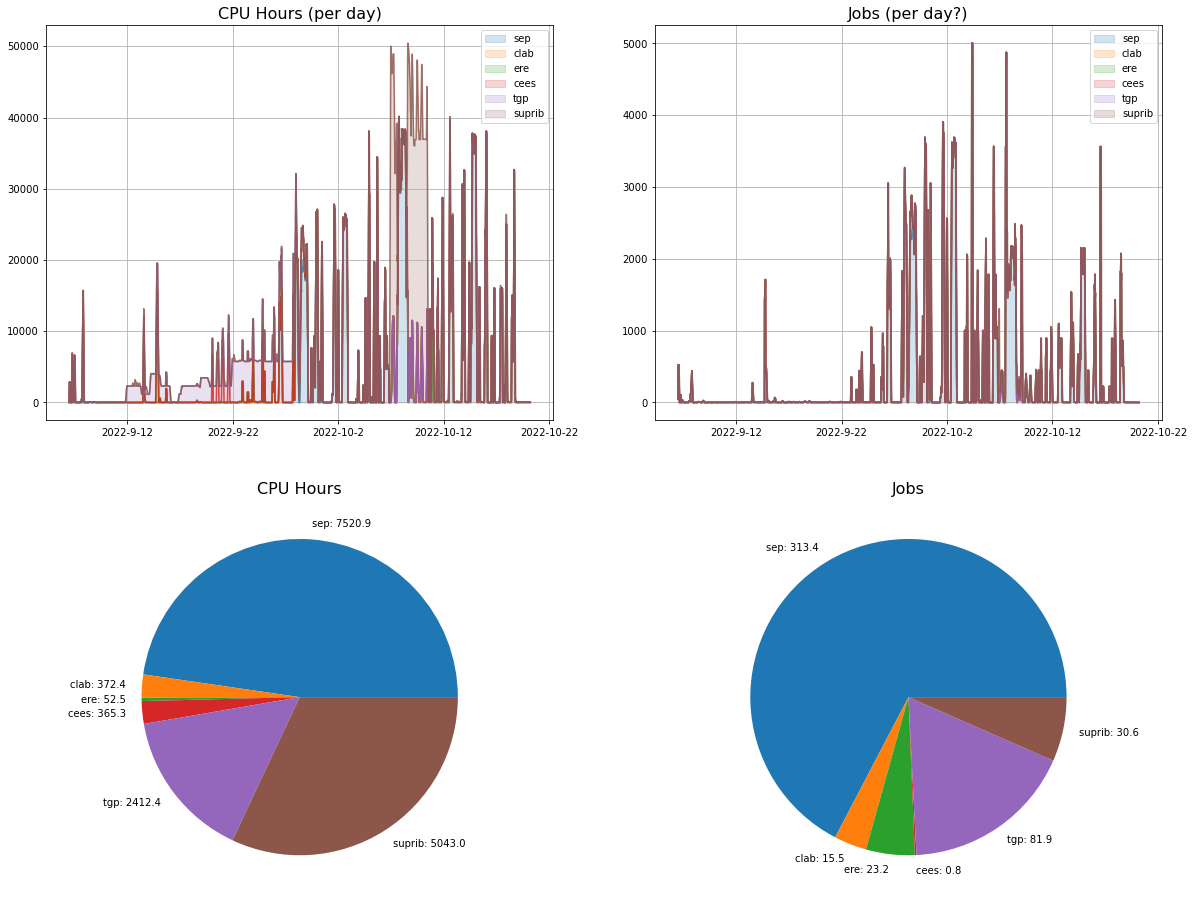

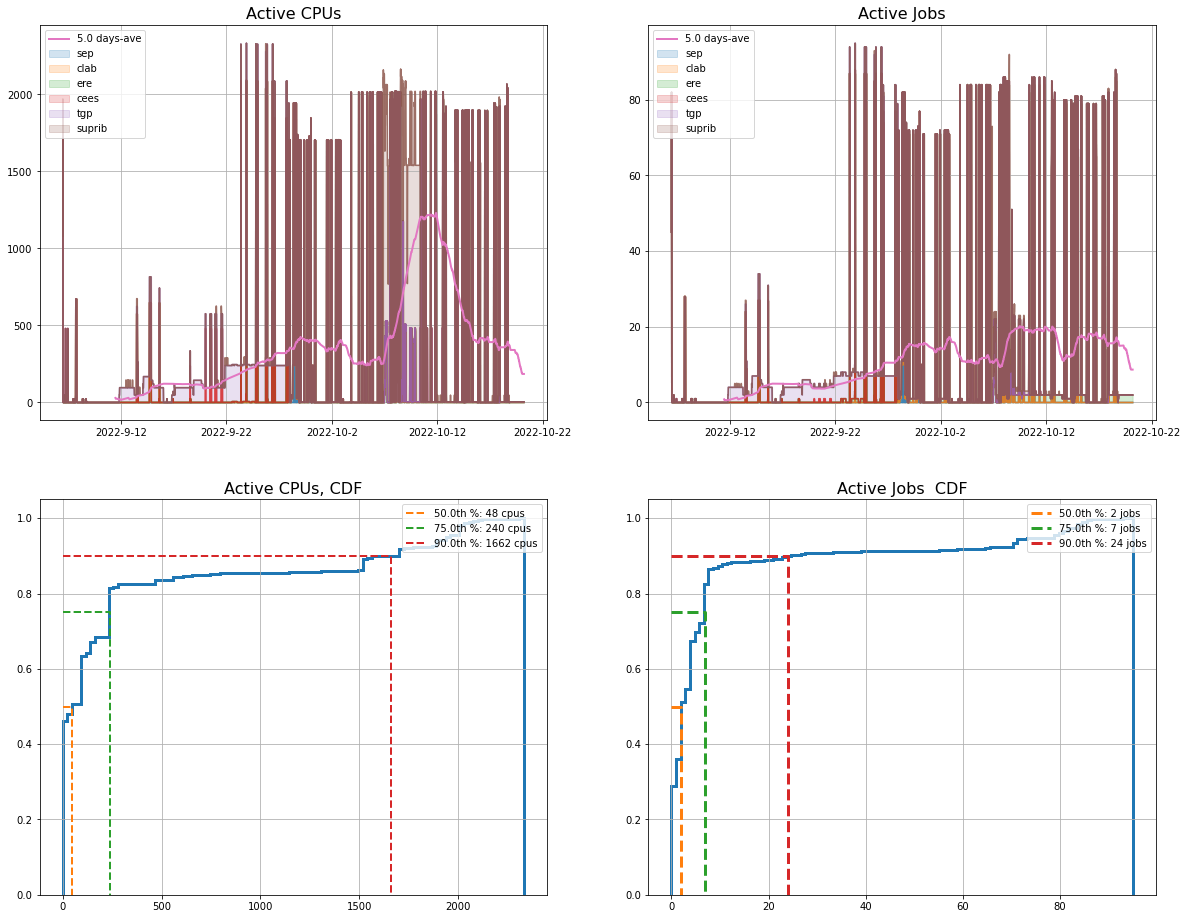

In [14]:
fg_cpuhl_acct = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Account')
fg_cpu_lc_acct = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Account')

/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2779: RuntimeWarning: invalid value encountered in greater_equal
  ix_k = numpy.where(numpy.logical_and(t_start<=t, t_end>=(t-bin_size) ))[0]


*** DEBUG t_now: 738448.4414201393, t_max: 738448.207662037


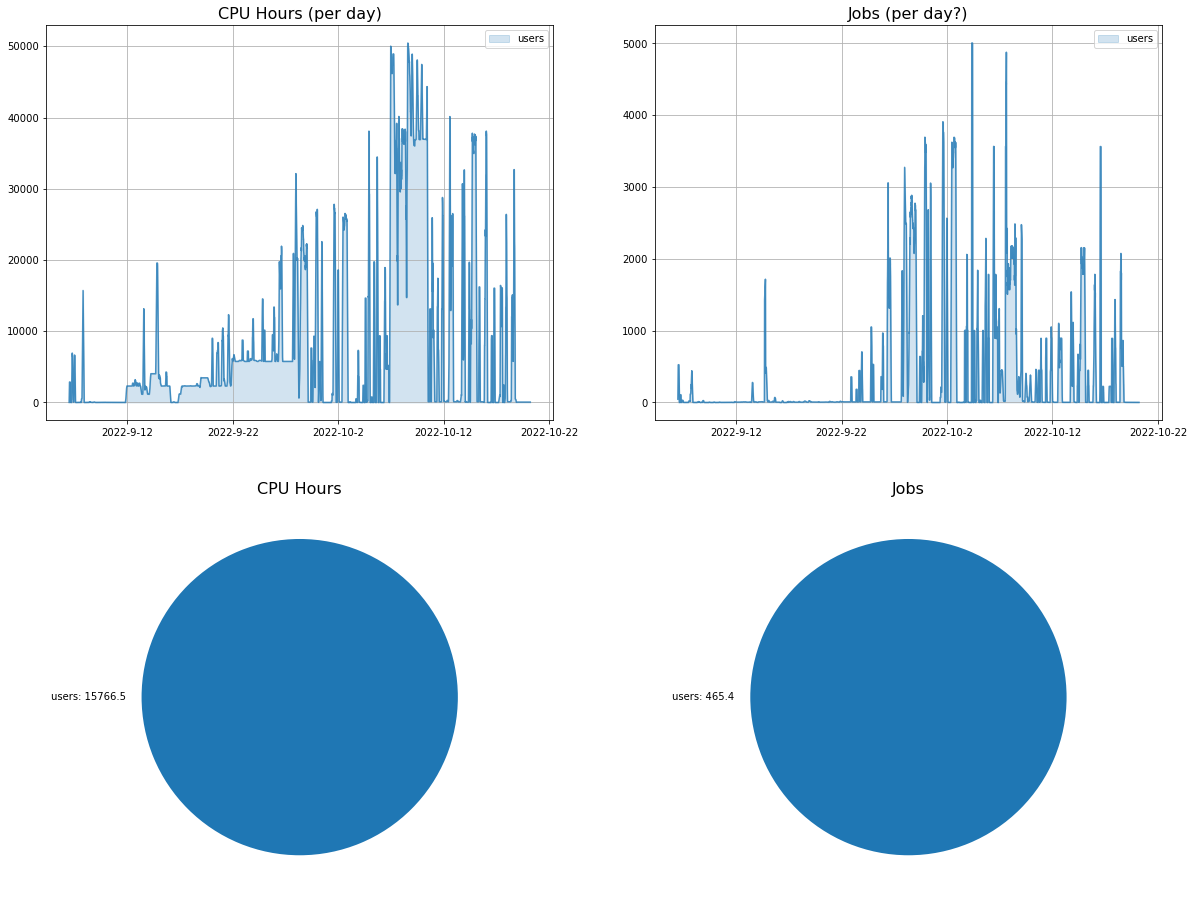

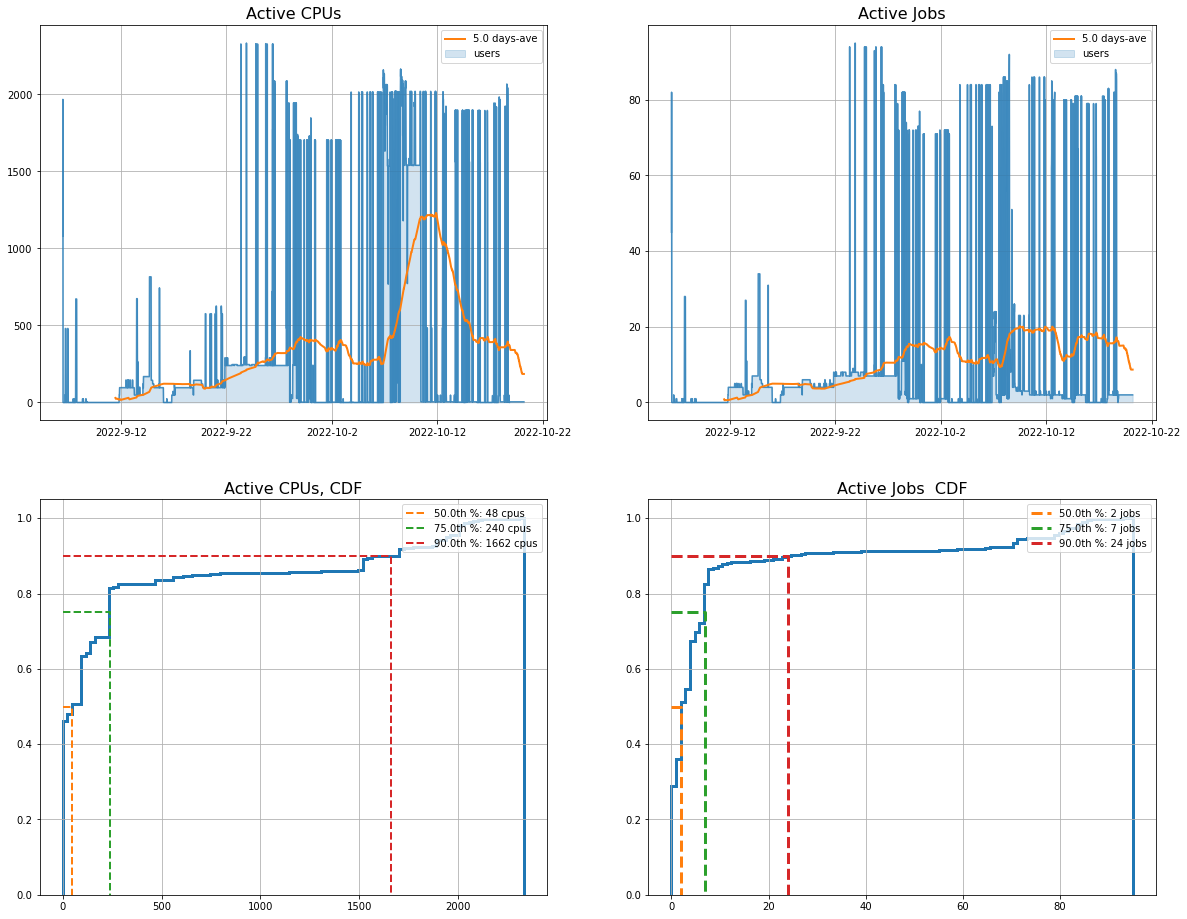

In [15]:
fg_cpuhl_acct = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Group')
fg_cpu_lc_acct = SACCT_obj.report_activecpus_jobs_layercake_and_CDFs(group_by='Group')

In [16]:
print('** ', SACCT_obj.dtype.names)

**  ('index', 'User', 'Group', 'GID', 'Account', 'JobName', 'JobID', 'JobIDRaw', 'Partition', 'State', 'Timelimit', 'NCPUS', 'NNodes', 'Submit', 'Eligible', 'Start', 'End', 'Elapsed', 'SystemCPU', 'UserCPU', 'TotalCPU', 'NTasks', 'CPUTimeRAW', 'Suspended', 'ReqTRES', 'AllocTRES', 'MaxRSS', 'AveRSS', 'AveVMSize', 'MaxVMSize', 'MaxDiskWrite', 'MaxDiskRead', 'AveDiskWrite', 'AveDiskRead', 'JobID_parent', 'NGPUs')


/home/myoder96/Codes/HPC_analytics/hpc_lib.py:2779: RuntimeWarning: invalid value encountered in greater_equal
  ix_k = numpy.where(numpy.logical_and(t_start<=t, t_end>=(t-bin_size) ))[0]


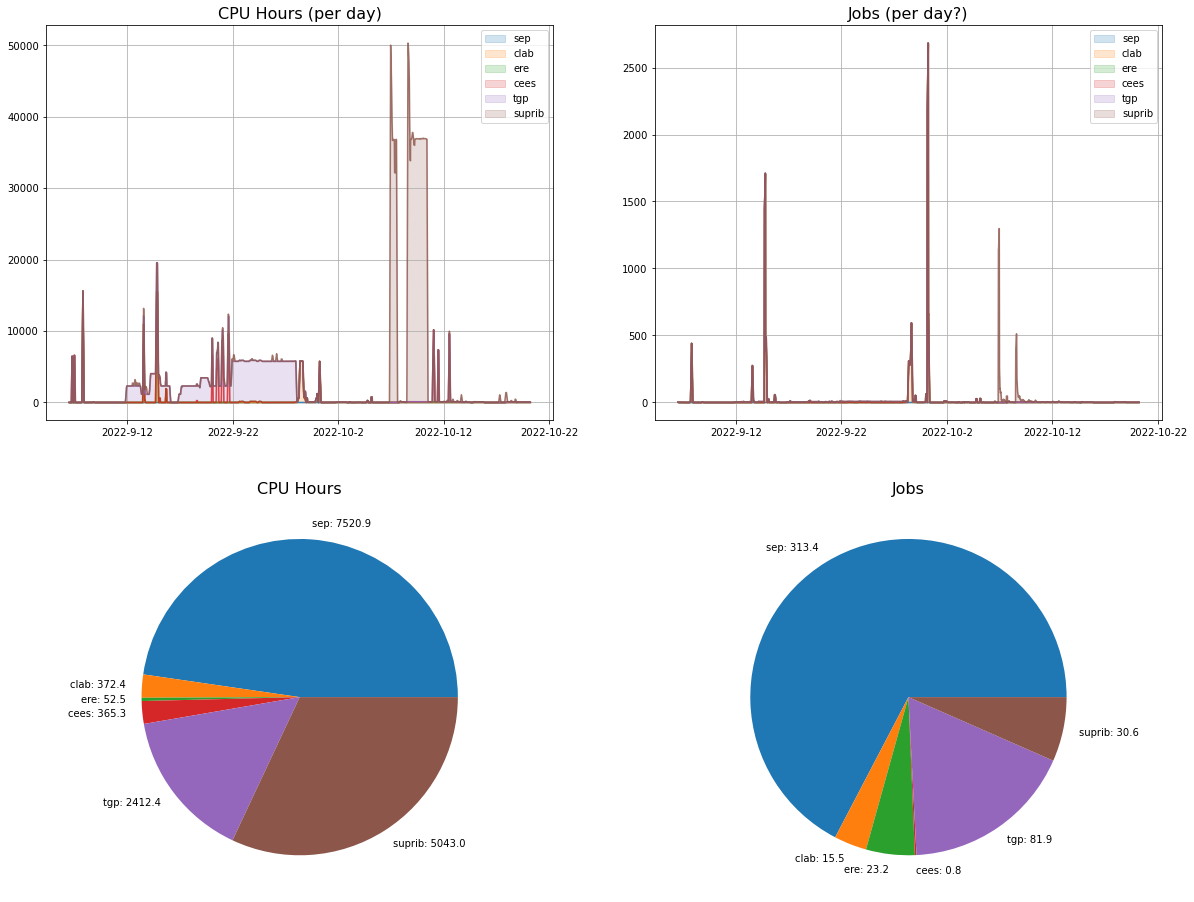

In [17]:
# A qick look at Accounts (or other breakout) with known inactive or graduated users removed.
ix_u = numpy.array([u not in ['cabrales', 'labraha2'] for u in SACCT_obj['User'].astype(str)])
fg_1 = SACCT_obj.report_cpuhours_jobs_layercake_and_pie(group_by='Account', jobs_summary=SACCT_obj[ix_u])

### User stat table
- Generate a table of summary user stats

In [ ]:
#
cpuh_pie_user = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed']*SACCT_obj['NCPUS'],
                                       slice_data=SACCT_obj['User'])
jobs_pie_user = hpc_lib.get_pie_slices(sum_data=SACCT_obj['Elapsed'], slice_data=SACCT_obj['User'])
#
#t0 = mpd.date2num(start_date)
t0 = min(SACCT_obj['Start'])
t1 = mpd.date2num(end_date)
delim = chr(9)
delim = ';'
print('*** CPU-hours: ')
#print('**  Name,   cpu-hours,    job-hours,  last_job_start', )
print(delim.join(['Name', 'cpu-hours', 'job-hours', 'n_jobs', 'last_job_start', 'Group', 'Accounts', 'Partitions']))
jindex = {nm:k for k,nm in enumerate(jobs_pie_user['name'])}
#print('** jindex: ', jindex)
for nm,n in cpuh_pie_user[numpy.argsort(cpuh_pie_user['value'])[::-1]]:
    if hasattr(nm,'decode'):
        nm = nm.decode()
    ix = SACCT_obj['User'].astype(type(nm)) == nm
    fg = plt.figure(figsize=(10,4))
    ax = fg.add_subplot(1,1,1)
    z = SACCT_obj.get_cpu_hours(jobs_summary=SACCT_obj[ix])
    ax.plot(z['time'], z['cpu_hours'], ls='-', marker='')
    ax.set_xlim(t0,t1)
    ax.grid()
    ax.set_title(f'{nm}: {n:.2f}', size=16)
    ax.set_ylabel('CPU hours', size=16)
    ax.set_xlabel('time $t$', size=16)
    #
#     fg.canvas.draw()
#     dt_epoch = hpc_lib.compute_mpd_epoch_dt(z['time'][0])
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(x + dt_epoch)) for x in ax.get_xticks()]
# #     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_value()))) + dt_epoch) )
# #               for s in ax.get_xticklabels()]

#     #
#     ax.set_xticklabels(lbls)
    lbls = hpc_lib.fg_time_labels_to_dates(ax=ax)
    #
    rw_vals = [nm, n, jobs_pie_user['value'][jindex[nm]], numpy.sum(ix).astype(int),\
          mpd.num2date(max(SACCT_obj['Start'][ix])), SACCT_obj['Group'][ix].astype(str)[0],\
                ','.join(numpy.unique(SACCT_obj['Account'][ix]).astype(str)),\
                ','.join(numpy.unique(SACCT_obj['Partition'][ix]).astype(str))]
    print(delim.join([str(x) for x in rw_vals]))
#     print(f"{nm.decode()}, {n}, {jobs_pie_user['value'][jindex[nm]]},\
#           {mpd.num2date(max(SACCT_obj['Start'][ix]))}, {SACCT_obj['Group'][ix].astype(str)[0]},\
#                 {delim.join(numpy.unique(SACCT_obj['Account'][ix]).astype(str))},\
#                 {delim.join(numpy.unique(SACCT_obj['Partition'][ix]).astype(str))}\
#                 ")
#
# print('*** Jobs-time:')
# print('**  Name,   n_jobs,   last_job_start')
# for nm,n in jobs_pie_user[numpy.argsort(jobs_pie_user['value'])[::-1]]:
#     ix = SACCT_obj['User'].astype(type(nm)) == nm
#     print(f"**  {nm.decode()}, {n}, {mpd.num2date(max(SACCT_obj['Start'][ix]))}, {SACCT_obj['Group'][ix][0]}")

*** CPU-hours: 
Name;cpu-hours;job-hours;n_jobs;last_job_start;Group;Accounts;Partitions


In [ ]:
print('** ', ax)
print('** ', ax.get_xticklabels()[0].get_position()[0])
print('** ', ax.get_xticks())

In [ ]:
print('** ', cpuh_pie_user.dtype)

In [ ]:
cpuh_jobs = SACCT_obj.get_cpu_hours(bin_size=1., n_points=5000)
cpuh_layers = SACCT_obj.get_cpu_hours_layer_cake(bin_size=1.)

In [ ]:
fg = plt.figure(figsize=(20,8))
ax1 = fg.add_subplot(1,2,1)
ax2 = fg.add_subplot(1,2,2)
ax1.grid()
#
N_max = float(130*24*24)
#
cpuh = next(iter(cpu_hours_jobs.values()))
z = numpy.zeros(len(cpuh['cpu_hours']))
X = cpuh['cpu_hours']['time']
dX = X[1]-X[0]
#
elapsed = {}

for pt,vls in cpu_hrs_jobs.items():
#     if vls['elapsed'] == 0.:
#         continue
    #print('*** {}: {}'.format(pt, vls.keys()))
    #
    elapsed[pt]=vls['elapsed']
    #
    z_prev = z.copy()
    dz = vls['cpu_hours']['cpu_hours']
    print('*** {}: sum(dz): {}'.format(pt, dX*numpy.sum(dz)/cpuh_bin))
    z += dz
    ln, = ax1.plot(X, z, label=pt)
    clr = ln.get_color()
    ax1.fill_between(X, z_prev, z, color=clr, alpha=.2)
    #
    #ax1.fill_between(X, z_prev, z, alpha=.2)

ax1.plot(X[0::len(X)-1], numpy.ones(2)*N_max, ls='--', lw=3.)
ax1.legend(loc=0)
#
# fg.canvas.draw()
# print('*** ax1.get_xticklabels(): ', [s.get_text() for s in ax1.get_xticklabels()])

# lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#          for s in ax1.get_xticklabels()]
# print('*** ', [s for s in ax1.get_xticklabels()])
# print('*** ', [s.get_position()[0] for s in ax1.get_xticklabels()])
# ax1.set_xticklabels(lbls)
# fg.canvas.draw()
#
pi_lbls, pi_vls = zip(*list(elapsed.items()))
pi_lbls = [f'{lbl}: {24.*x/1000:.1f}k' for lbl,x in zip(pi_lbls, pi_vls)]
ax2.pie(pi_vls, labels=pi_lbls)
#
for ky,vl in elapsed.items():
    print(f'{ky}: {vl*24.} cpu-hrs')
    

In [ ]:
print('** ', numpy.sum([x for x in elapsed.values()])*24.)


In [ ]:
print('*** ', numpy.min(SACCT_obj.jobs_summary['Start']) , numpy.min(SACCT_obj.jobs_summary['End']))

In [25]:
# Now, let's get a some reports for specific users, namely Lauren and Eric's former student(s) to estimate
#. requirements for their successors.
#
# Also, TODO: layer cake for active_cpus ?
# NOTE: for up and coming "how busy is the queue?" reporting, something like this:
# squeue -p serc --Format=jobid,jobarrayid,partition,username,state,timeused,timeleft,allocnodes,numnodes,numcpus


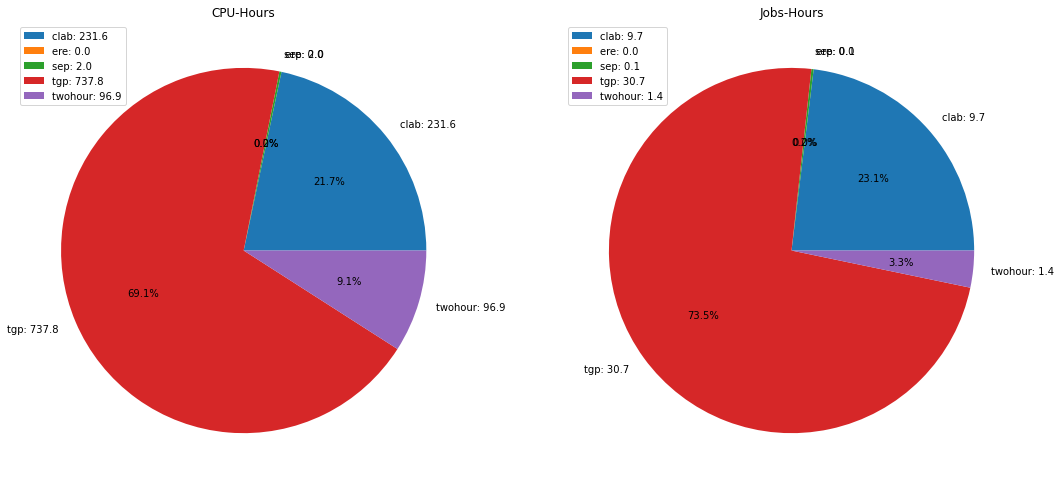

In [26]:


#
#pi_slices = hpc_lib.get_pie_slices(SACCT_obj.jobs_summary['Elapsed'], SACCT_obj.jobs_summary['Partition'])
fg = plt.figure(figsize=(18,10))
ax1 = fg.add_subplot(1,2,1)
ax2 = fg.add_subplot(1,2,2)
#
ax1.set_title('CPU-Hours')
ax2.set_title('Jobs-Hours')
#
pie_cpuh_data = hpc_lib.plot_pie(sum_data=SACCT_obj.jobs_summary['Elapsed']*SACCT_obj.jobs_summary['NCPUS'],
                                slice_data=SACCT_obj.jobs_summary['Partition'], 
                            ax=ax1
                                )
#pi_slices = ax.pie(pi_slices[:,1], labels=pi_slices[:,0])
pie_jobs_data = hpc_lib.plot_pie(sum_data=SACCT_obj.jobs_summary['Elapsed'], 
                            slice_data=SACCT_obj.jobs_summary['Partition'], 
                            ax=ax2)
ax1.legend(loc=0)
ax2.legend(loc=0)



***  [('time', '>f8'), ('ere', '>f8'), ('twohour', '>f8'), ('clab', '>f8'), ('tgp', '>f8'), ('sep', '>f8')]
***  [738404.47292824 738404.47559243 738404.47825662 738404.4809208
 738404.48358499 738404.48624918 738404.48891337 738404.49157756
 738404.49424174 738404.49690593]
***  [  0.          81.14666426  81.14666426  81.14666426 122.69999879
 122.69999879 145.85620967 163.86119231 201.50216808 245.79610807]
** **,  [('annaxli', 9.65079861e+00) ('cabrales', 8.44085648e-01)
 ('klevtsov', 1.12962963e-02) ('myoder96', 3.93518519e-04)
 ('nmbader', 3.31944444e-02) ('sujiang', 4.38935185e-01)
 ('taiyi', 1.19675926e-01) ('yyang85', 3.07424653e+01)
 ('ziwanglu', 0.00000000e+00)]


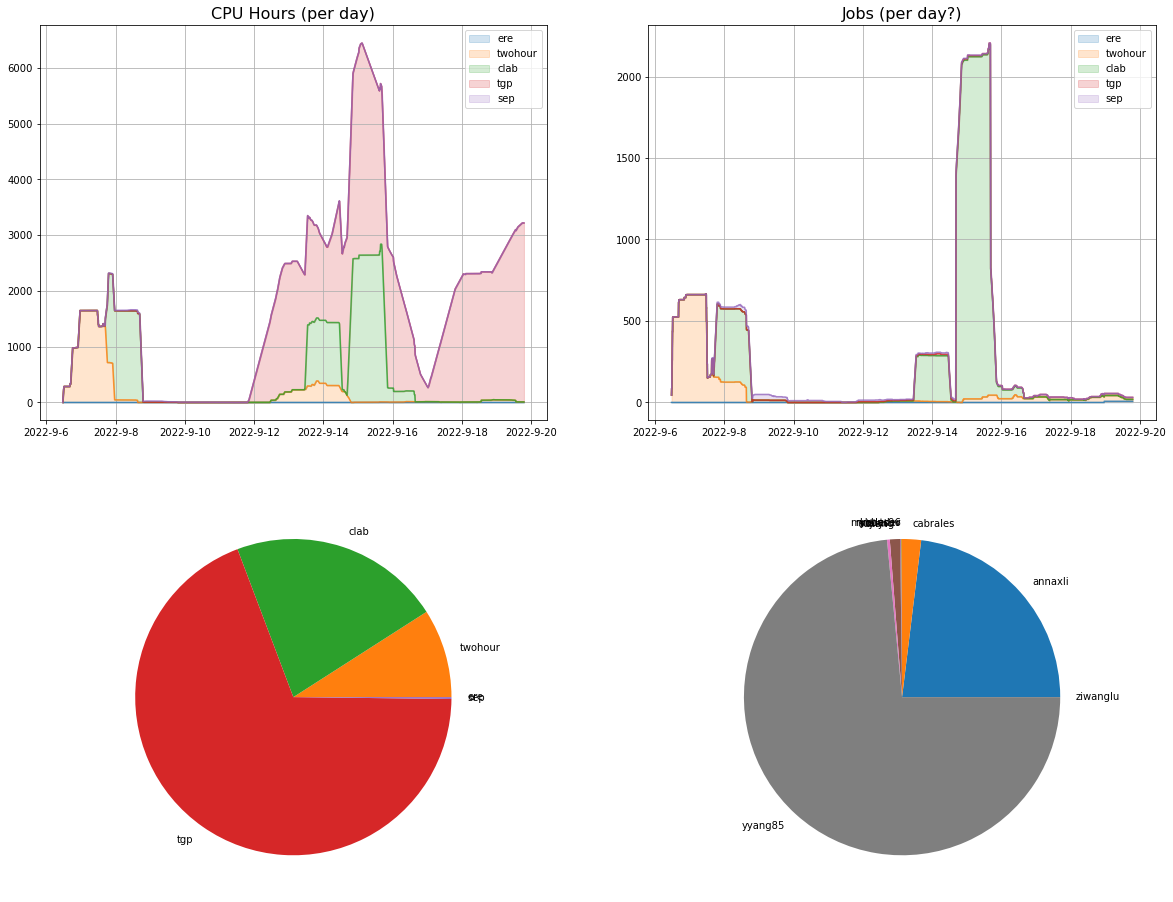

In [43]:
fg = plt.figure(figsize=(20,16))
ax1 = fg.add_subplot(2,2,1)
ax2 = fg.add_subplot(2,2,2)
ax3 = fg.add_subplot(2,2,3)
ax4 = fg.add_subplot(2,2,4)
ax1.grid()
ax2.grid()
#
ax1.set_title('CPU Hours (per day)', size=16)
ax2.set_title('Jobs (per day?)', size=16)
#
cpuh = cpuh_layers['cpu_hours']
jobs = cpuh_layers['jobs']
T = cpuh['time']

print('*** ', cpuh.dtype)
print('*** ', cpuh['time'][0:10])
print('*** ', cpuh['twohour'][0:10])
#
z_cpuh = hpc_lib.plot_layer_cake(data=cpuh, layers=cpuh.dtype.names[1:], time_col='time', ax=ax1)
z_jobs = hpc_lib.plot_layer_cake(data=jobs, layers=cpuh.dtype.names[1:], time_col='time', ax=ax2)
#
# pi charts. left: cpu-hours, right job-time
pi_cpuh_lbls, pi_cpuh_vls = zip(*list(cpuh_layers['elapsed'].items()))
#pi_jobs_lbls, pi_jobs_vls = zip(*list({ky:numpy.sum(SACCT_obj.jobs_summary['Elapsed'][SACCT_obj.jobs_summary['Partition']==ky.encode()]) for ky in cpuh.dtype.names[1:]}.items()))
user_pie = hpc_lib.get_pie_slices(sum_data=SACCT_obj.jobs_summary['Elapsed'], 
                                                   slice_data=SACCT_obj.jobs_summary['User'])
print('** **, ', user_pie)
pi_jobs_lbls = user_pie['name']
pi_jobs_vls  = user_pie['value']
#
ax3.pie(pi_cpuh_vls, labels=pi_cpuh_lbls)
ax4.pie(pi_jobs_vls, labels=pi_jobs_lbls)
#
ax1.legend(loc=0)
ax2.legend(loc=0)
#
# fg.canvas.draw()
# for ax in (ax1, ax2):
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text()))) + SACCT_obj.dt_mpd_epoch ) ) 
#              for s in ax.get_xticklabels()]
#     ax.set_xticklabels(lbls)
#fg.canvas.draw()
#lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#         for s in ax1.get_xticklabels()]
#ax1.set_xticklabels(lbls)


In [44]:
pi_cpuh_vls, pi_cpuh_lbls = zip(*list(cpuh_layers['elapsed'].items()))
pi_jobs_vls, pi_jobs_lbls = zip(*list({ky:numpy.sum(SACCT_obj.jobs_summary['Elapsed'][SACCT_obj.jobs_summary['Partition']==ky.encode()]) for ky in cpuh.dtype.names[1:]}.items()))

In [45]:
print('** ', pi_cpuh_vls, pi_cpuh_lbls)
print('** ', pi_jobs_vls, pi_jobs_lbls)

**  ('ere', 'twohour', 'clab', 'tgp', 'sep') (0.0, 96.85112268518519, 231.61064814814816, 737.8191666666669, 1.9822222222222219)
**  ('ere', 'twohour', 'clab', 'tgp', 'sep') (0.0, 0.0, 0.0, 0.0, 0.0)


In [46]:
jobs_cpu = SACCT_obj.active_jobs_cpu(n_points=5000, bin_size=None, t_min=None, t_max=None, t_now=None, n_cpu=None, 
                                     jobs_summary=None, verbose=None, mpp_chunksize=10000, nan_to=0.)


** DEBUG: shapes:: (3963,), (3963,)
*** DEBUG: 5000, None


In [47]:
sb = b'astring'
print('** ', sb, str(sb), bytes.decode(sb))

Sb = numpy.array([b'Sb1', b'Sb2', b'Sb3'])
S = numpy.array(['S1', 'S2', 'S3'])
print('* *: ', S, S.astype(str))
print('** [{}] :: [{}]'.format(S.dtype, Sb.dtype))
print('** ', S.astype(bytes), S.astype(bytes).dtype, S.dtype)
print('** ', isinstance('abc', type('def')))

print('*** ***: ', numpy.array(S.astype(Sb.dtype)))
#
n_f = 2
x = numpy.random.random()
print(f'** x: {x}, {x:.2f}, {x:.{n_f}f}')

**  b'astring' b'astring' astring
* *:  ['S1' 'S2' 'S3'] ['S1' 'S2' 'S3']
** [<U2] :: [|S3]
**  [b'S1' b'S2' b'S3'] |S2 <U2
**  True
*** ***:  [b'S1' b'S2' b'S3']
** x: 0.8039182189520725, 0.80, 0.80


In [48]:
acpu_layer_cake = SACCT_obj.get_active_cpus_layer_cake(layer_field='Partition')

*** DEBUG t_now: 738447.581649257, t_max: 738417.7912037037


In [49]:
dt_ep = hpc_lib.compute_mpd_epoch_dt(738150)
print('** ', dt_ep)
print('** ', SACCT_obj.compute_mpd_epoch_dt())
print('** *', hpc_lib.compute_mpd_epoch_dt(dtm.datetime.now()))
#
#print('** ', isinstance(numpy.datetime64(dtm.datetime.now())) )

**  0.0
**  0.0
** * 0.0


***  [('time', '>f8'), ('ere', '>f8'), ('twohour', '>f8'), ('clab', '>f8'), ('tgp', '>f8'), ('sep', '>f8')]
***  [738404.47292824 738404.47559243 738404.47825662 738404.4809208
 738404.48358499 738404.48624918 738404.48891337 738404.49157756
 738404.49424174 738404.49690593]
***  [1.080e+03 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.968e+03
 1.000e+00 1.968e+03 0.000e+00]


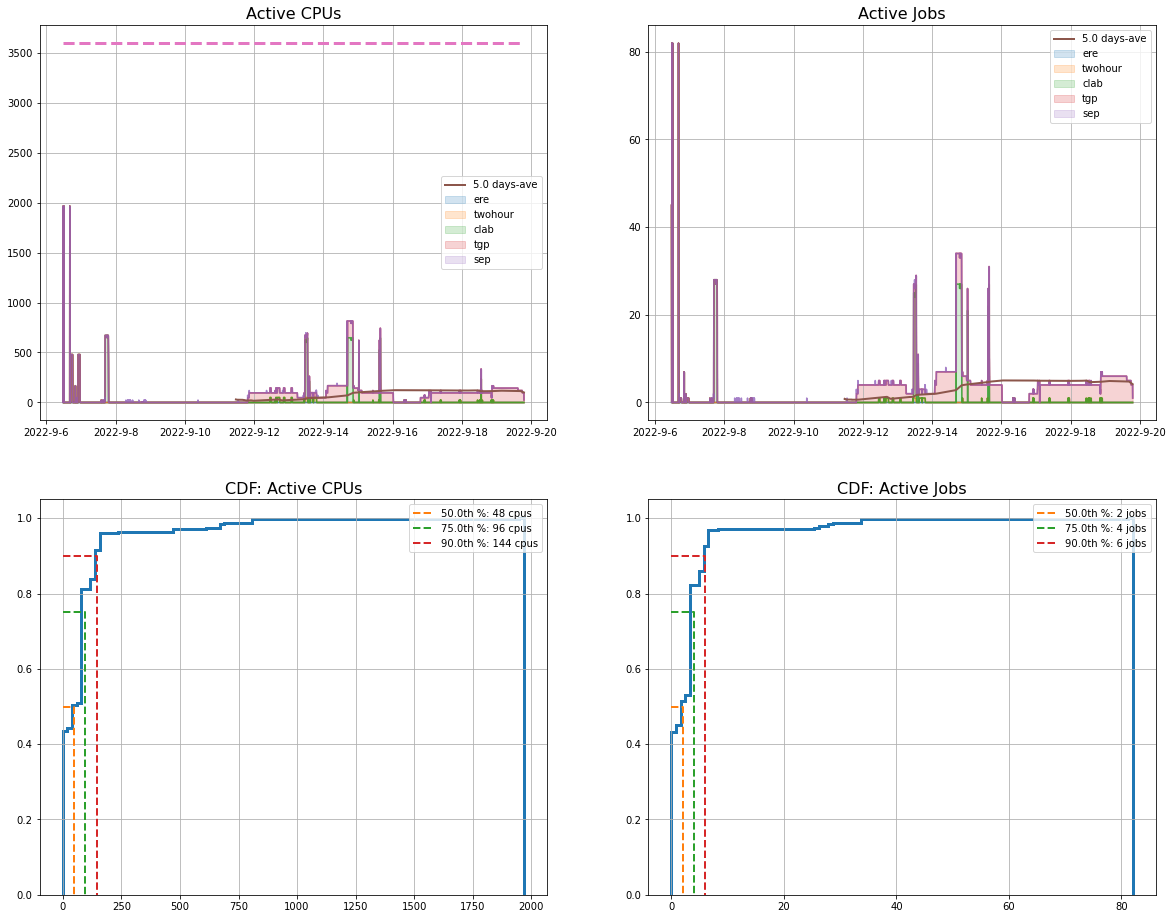

In [50]:
fg = plt.figure(figsize=(20,16))
ax1 = fg.add_subplot(2,2,1)
ax2 = fg.add_subplot(2,2,2)
ax3 = fg.add_subplot(2,2,3)
ax4 = fg.add_subplot(2,2,4)
ax1.grid()
ax2.grid()
#
ax1.set_title('Active CPUs', size=16)
ax2.set_title('Active Jobs', size=16)
ax3.set_title('CDF: Active CPUs', size=16)
ax4.set_title('CDF: Active Jobs', size=16)
#
cpus = acpu_layer_cake['N_cpu']
jobs = acpu_layer_cake['N_jobs']
T = cpus['time']
N_max = 150*24.
#
print('*** ', cpus.dtype)
print('*** ', cpus['time'][0:10])
print('*** ', cpus['twohour'][0:10])
#
hpc_lib.plot_layer_cake(data=acpu_layer_cake['N_cpu'], ax=ax1)
hpc_lib.plot_layer_cake(data=acpu_layer_cake['N_jobs'], ax=ax2)
#
# z_cpus = numpy.zeros(len(cpus))
# z_jobs = numpy.zeros(len(jobs))
# for lyr in cpus.dtype.names:
#     if lyr == 'time':
#         continue
#     #
#     z_cpus_prev = z_cpus.copy()
#     z_jobs_prev = z_jobs.copy()
#     dz_cpus = cpus[lyr]
#     dz_jobs = jobs[lyr]
#     #
#     z_cpus += dz_cpus
#     z_jobs += dz_jobs
#     #
#     ln_cpus, = ax1.plot(T, z_cpus, ls='-', alpha=.8)
#     clr = ln_cpus.get_color()
#     ax1.fill_between(T, z_cpus_prev, z_cpus, color=clr, alpha=.2, label=lyr)
#     #
#     ln_jobs, = ax2.plot(T, z_jobs, ls='-', alpha=.8)
#     clr = ln_jobs.get_color()
#     ax2.fill_between(T, z_jobs_prev, z_jobs, color=clr, alpha=.2, label=lyr)
#
# get an ave-len of about a day...
n_days=5.
ave_len = int(numpy.ceil(n_days*len(T)/(T[-1] - T[0])))
#z_cpus = acpu_layer_cake['N_cpu'].dtype.names
z_cpu = ax1.get_lines()[-1].get_ydata()
z_jobs = ax2.get_lines()[-1].get_ydata()
z_cpus_smooth = hpc_lib.running_mean(z_cpu, ave_len)
z_jobs_smooth = hpc_lib.running_mean(z_jobs, ave_len)
#
ax1.plot(T[-len(z_cpus_smooth):], z_cpus_smooth, ls='-', marker='', lw=2, label=f'{n_days} days-ave')
ax2.plot(T[-len(z_jobs_smooth):], z_jobs_smooth, ls='-', marker='', lw=2, label=f'{n_days} days-ave')
#
# # pi charts. left: cpu-hours, right job-time
def f_ix(ky, sacct_obj):
    return [sacct_obj.jobs_summary['Partition']==ky.encode()]
#
# Pie charts aren't really 
# pi_cpus_lbls, pi_cpus_vls = zip(*list({ky:numpy.sum(SACCT_obj.jobs_summary['Elapsed'][f_ix(ky, SACCT_obj)]*SACCT_obj.jobs_summary['NCPUS'][f_ix(ky, SACCT_obj)]) for ky in cpuh.dtype.names[1:]}.items()))
# pi_jobs_lbls, pi_jobs_vls = zip(*list({ky:numpy.sum(SACCT_obj.jobs_summary['Elapsed'][SACCT_obj.jobs_summary['Partition']==ky.encode()]) for ky in cpuh.dtype.names[1:]}.items()))
# # #
# ax3.pie(pi_cpus_vls, labels=pi_cpus_lbls)
# ax4.pie(pi_jobs_vls, labels=pi_jobs_lbls)
#
qs = numpy.array([.5, .75, .9])
qs_cpus = numpy.quantile(z_cpu, qs)
qs_jobs = numpy.quantile(z_jobs, qs)
#
hh_cpus = ax3.hist(z_cpu, bins=100, cumulative=True, density=True, histtype='step', lw=3.)
for x,y in zip(qs_cpus, qs):
    #ax3.plot([0., qs_cpus[-1], qs_cpus[-1]], [qs[-1], qs[-1], 0.], ls='--', color='r', lw=2. )
    ax3.plot([0., x, x], [y, y, 0.], ls='--', lw=2., label=f'{y*100.}th %: {x:.0f} cpus' )
#
hh_jobs = ax4.hist(z_jobs, bins=100, cumulative=True, density=True, histtype='step', lw=3.)
for x,y in zip(qs_jobs, qs):
    #ax3.plot([0., qs_cpus[-1], qs_cpus[-1]], [qs[-1], qs[-1], 0.], ls='--', color='r', lw=2. )
    ax4.plot([0., x, x], [y, y, 0.], ls='--', lw=2., label=f'{y*100.}th %: {x:.0f} jobs' )



#
ax1.plot(T[0::len(T)-1], numpy.ones(2)*N_max, ls='--', lw=3.0  )
#
ax1.legend(loc=0)
ax2.legend(loc=0)
ax3.legend(loc=0)
ax4.legend(loc=0)
#
ax3.grid()
ax4.grid()

# fg.canvas.draw()
# for ax in (ax1, ax2):
#     lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text())))) ) 
#              for s in ax.get_xticklabels()]
#     ax.set_xticklabels(lbls)
# fg.canvas.draw()



In [51]:
print('*** ', mpd.num2date(738150))
print('*** ', mpd.date2num(dtm.datetime(2022,1,1)))
print('*** ', 3600/24)
#
print('** ', SACCT_obj.jobs_summary.dtype.descr)
print('** cpu_hours capacity: ', 350*24*24)
print('** quantiles_cpu: ', qs_cpus)

***  2021-12-26 00:00:00+00:00
***  738156.0
***  150.0
**  [('index', '<i8'), ('User', '|O'), ('Group', '|O'), ('GID', '|O'), ('Account', '|O'), ('JobName', '|O'), ('JobID', '|O'), ('JobIDRaw', '|O'), ('Partition', '|O'), ('State', '|O'), ('Timelimit', '<f8'), ('NCPUS', '<i8'), ('NNodes', '<i8'), ('Submit', '<f8'), ('Eligible', '<f8'), ('Start', '<f8'), ('End', '<f8'), ('Elapsed', '<f8'), ('SystemCPU', '<f8'), ('UserCPU', '<f8'), ('TotalCPU', '<f8'), ('NTasks', '<f8'), ('CPUTimeRAW', '|O'), ('Suspended', '|O'), ('ReqTRES', '|O'), ('AllocTRES', '|O'), ('MaxRSS', '<f8'), ('AveRSS', '<f8'), ('AveVMSize', '<f8'), ('MaxVMSize', '<f8'), ('MaxDiskWrite', '<f8'), ('MaxDiskRead', '<f8'), ('AveDiskWrite', '<f8'), ('AveDiskRead', '<f8'), ('JobID_parent', '|O'), ('NGPUs', '<i8')]
** cpu_hours capacity:  201600
** quantiles_cpu:  [ 48.  96. 144.]


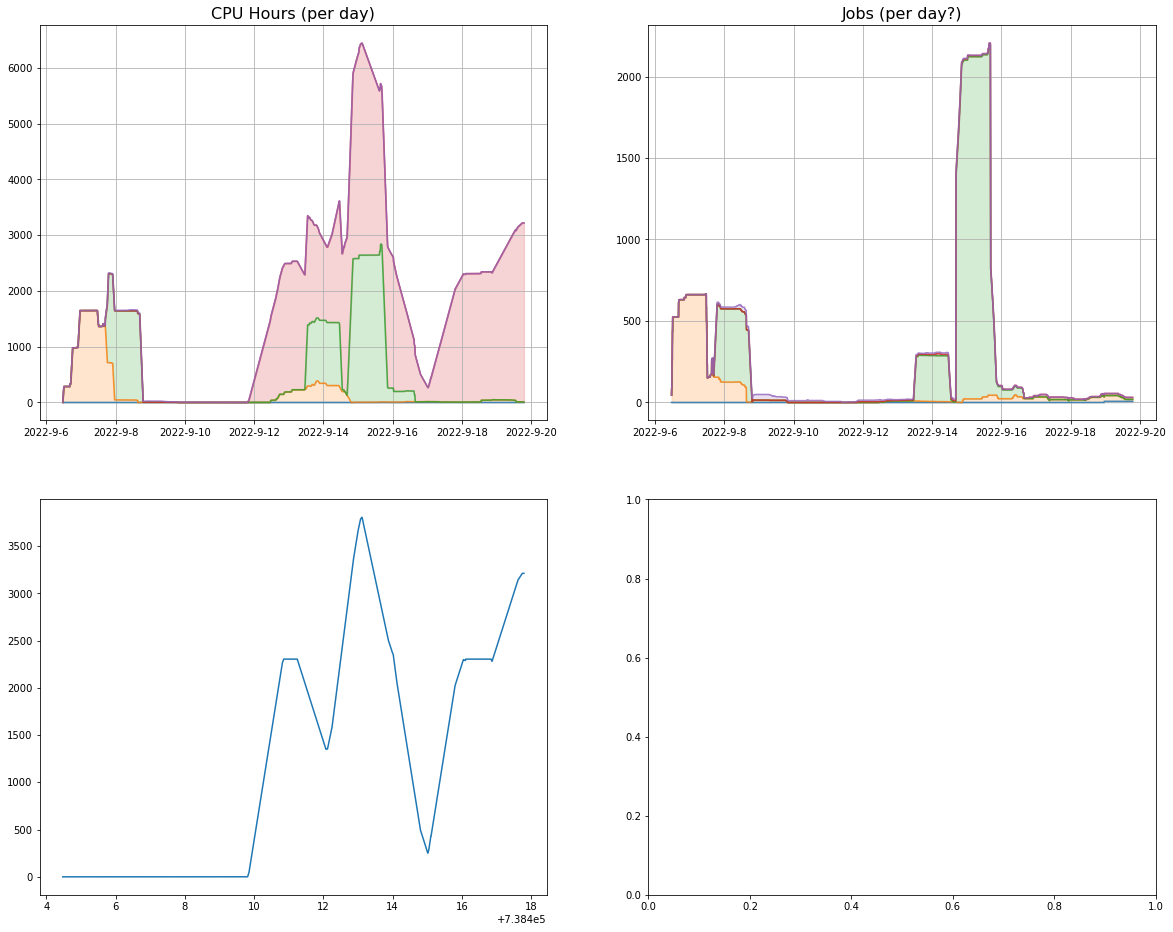

In [52]:
fg = plt.figure(figsize=(20,16))
ax1 = fg.add_subplot(2,2,1)
ax2 = fg.add_subplot(2,2,2)
ax3 = fg.add_subplot(2,2,3)
ax4 = fg.add_subplot(2,2,4)
ax1.grid()
ax2.grid()
#
ax1.set_title('CPU Hours (per day)', size=16)
ax2.set_title('Jobs (per day?)', size=16)
#
cpuh = cpuh_layers['cpu_hours']
hpc_lib.plot_layer_cake(data=cpuh_layers['cpu_hours'], ax=ax1)
hpc_lib.plot_layer_cake(data=cpuh_layers['jobs'], ax=ax2)

ax3.plot(cpuh['time'], cpuh['tgp'])

In [53]:
NGPUS = [s.split('gpu=')[1].split(',')[0] if 'gpu=' in s else 0 
         for s in SACCT_obj.jobs_summary['AllocTRES'].astype(str)]

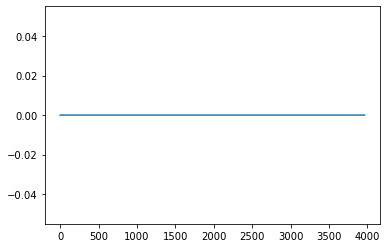

In [54]:
plt.plot(SACCT_obj.get_NGPUs())

### Mazama GPU activity

In [55]:
maz_h5 = 'sacct_data/sacct_pNONE_gNONE_uNone_20211222_20220620.h5'
SACCT_serc = SACCT_obj = hpc_lib.SACCT_data_from_h5(maz_h5, keep_raw_data=False, n_cpu=n_cpus)

# serc_gpu_activity = SACCT_serc.active_jobs_cpu(jobs_summary=None, bin_size=1., 
#                                                NCPUs=SACCT_serc.get_NGPUs())

OSError: Unable to open file (unable to open file: name = 'sacct_data/sacct_pNONE_gNONE_uNone_20211222_20220620.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
gpu_layers = SACCT_serc.get_active_cpus_layer_cake(layer_field='Group', NCPUs=SACCT_serc.get_NGPUs())

In [ ]:
# For MAZAMA
#
pi_gpu_grps = [s for s in gpu_layers['N_cpu'].dtype.names[1:]]
print(f'** {pi_gpu_lbls}' )
#
NGPU = SACCT_serc.get_NGPUs()
#
#pi_gpu_vals = numpy.zeros(len(pi_gpu_lbls))
pi_gpu_vals = []
pi_gpu_lbls = []
for k,g in enumerate(pi_gpu_grps):
    ix = SACCT_serc.jobs_summary['Group'].astype(str)==g
    #
    n_gpus = numpy.sum(SACCT_serc.jobs_summary['Elapsed'][ix] * NGPU[ix])
    if n_gpus <= 0.:
        continue
    #
    pi_gpu_vals += [n_gpus]
    pi_gpu_lbls += [f'{g}: {pi_gpu_vals[-1]:.1f}']
#
print('** vals: ', pi_gpu_vals)
#pi_gpu_lbls = [f'{s}: {v:.1f}' for s,v in zip(pi_gpu_lbls, pi_gpu_vals) ]


fg = plt.figure(figsize=(18,16))
ax1 = fg.add_subplot(2,1,1)
ax2 = fg.add_subplot(2,2,3)
ax3 = fg.add_subplot(2,2,4)
ax1.grid()
#ax2.grid()
ax3.grid()
#
hpc_lib.plot_layer_cake(gpu_layers['N_cpu'], ax=ax1)
z_gpus = ax1.lines[-1].get_ydata()
qs = [.5, .75, .9]
qs_gpu = numpy.quantile(z_gpus, qs)
#
print('*** keys(): ', gpu_layers.keys())
ax2.pie(pi_gpu_vals, labels=pi_gpu_lbls) 
ax2.legend(loc=0)
#
hh_cpus = ax3.hist(z_gpus, bins=100, cumulative=True, density=True, histtype='step', lw=3.)
for x,y in zip(qs_gpu, qs):
    #ax3.plot([0., qs_cpus[-1], qs_cpus[-1]], [qs[-1], qs[-1], 0.], ls='--', color='r', lw=2. )
    ax3.plot([0., x, x], [y, y, 0.], ls='--', lw=2., label=f'{y*100.}th %: {x:.0f} gpus' )

ax1.set_title('Active GPUs', size=16)
ax3.legend(loc=0)

### SERC GPU activity

In [ ]:
serc_h5 = 'sacct_data/serc_sacct_20211126_20220525.h5'
SACCT_serc = hpc_lib.SACCT_data_from_h5(serc_h5, keep_raw_data=False, n_cpu=n_cpus)

serc_gpu_activity = SACCT_serc.active_jobs_cpu(jobs_summary=None, bin_size=1., 
                                               NCPUs=SACCT_serc.get_NGPUs())

In [ ]:
gpu_layers = SACCT_serc.get_active_cpus_layer_cake(layer_field='Group', NCPUs=SACCT_serc.get_NGPUs())

In [ ]:
pi_gpu_grps = [s for s in gpu_layers['N_cpu'].dtype.names[1:]]
print(f'** {pi_gpu_lbls}' )
#
NGPU = SACCT_serc.get_NGPUs()
#
#pi_gpu_vals = numpy.zeros(len(pi_gpu_lbls))
pi_gpu_vals = []
pi_gpu_lbls = []
for k,g in enumerate(pi_gpu_grps):
    ix = SACCT_serc.jobs_summary['Group'].astype(str)==g
    #
    n_gpus = numpy.sum(SACCT_serc.jobs_summary['Elapsed'][ix] * NGPU[ix])
    if n_gpus <= 0.:
        continue
    #
    pi_gpu_vals += [n_gpus]
    pi_gpu_lbls += [f'{g}: {pi_gpu_vals[-1]:.1f}']
#
print('** vals: ', pi_gpu_vals)
#pi_gpu_lbls = [f'{s}: {v:.1f}' for s,v in zip(pi_gpu_lbls, pi_gpu_vals) ]


fg = plt.figure(figsize=(18,16))
ax1 = fg.add_subplot(2,1,1)
ax2 = fg.add_subplot(2,2,3)
ax3 = fg.add_subplot(2,2,4)
ax1.grid()
#ax2.grid()
ax3.grid()
#
hpc_lib.plot_layer_cake(gpu_layers['N_cpu'], ax=ax1)
z_gpus = ax1.lines[-1].get_ydata()
qs = [.5, .75, .9]
qs_gpu = numpy.quantile(z_gpus, qs)
#
print('*** keys(): ', gpu_layers.keys())
ax2.pie(pi_gpu_vals, labels=pi_gpu_lbls) 
ax2.legend(loc=0)
#
hh_cpus = ax3.hist(z_gpus, bins=100, cumulative=True, density=True, histtype='step', lw=3.)
for x,y in zip(qs_gpu, qs):
    #ax3.plot([0., qs_cpus[-1], qs_cpus[-1]], [qs[-1], qs[-1], 0.], ls='--', color='r', lw=2. )
    ax3.plot([0., x, x], [y, y, 0.], ls='--', lw=2., label=f'{y*100.}th %: {x:.0f} gpus' )

ax1.set_title('Active GPUs', size=16)
ax3.legend(loc=0)


In [ ]:
print('** ', gpu_layers['N_cpu'].dtype.names)

In [ ]:
cpu_jobs_serc = SACCT_serc.active_jobs_cpu()


In [ ]:
serc_cpu_qs = numpy.quantile(cpu_jobs_serc['N_cpu'], [.5, .75, .9])
print('** qs: ', serc_cpu_qs)

In [ ]:
acpu = acpu_layer_cake['N_cpu']
fg = plt.figure(figsize=(18,16))
ax1 = fg.add_subplot(1,1,1)
#
ax1.grid()
ax1.plot(acpu['time'], acpu['tgp'])

fg.canvas.draw()
#lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text()))) - hpc_lib.dt_mpd_epoch) ) 
#         for s in ax1.get_xticklabels()]
lbls = [hpc_lib.simple_date_string(mpd.num2date(float(hpc_lib.fix_to_ascii(str(s.get_text()))) + SACCT_obj.dt_mpd_epoch) ) 
         for s in ax1.get_xticklabels()]
ax1.set_xticklabels(lbls)


In [ ]:
print('*** ', SACCT_serc.jobs_summary.dtype)

In [ ]:
print('*** ', hpc_lib.kmg_to_num('105k'))
print('** ', [hpc_lib.kmg_to_num(s) for s in ['11k', '11m', '11M', '11g']])
print('** ', [hpc_lib.kmg_to_num(s) for s in ['11', '11.3', '', 's']])

In [ ]:
print('** ', SACCT_obj.jobs_summary.dtype.names)

In [ ]:
fg = plt.figure(figsize=(13,8))
ax = fg.add_subplot(1,1,1)
#
print('** ', numpy.sum([not numpy.isnan(x) for x in SACCT_obj.jobs_summary['MaxRSS']]))
hh = ax.hist(SACCT_obj.jobs_summary['MaxRSS'], bins=100, histtype='step', cumulative=True)

In [ ]:
os.system('hostname')

In [ ]:
import socket
socket.gethostname()